In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time 
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
np.random.seed(0)


In [42]:
noisy_circles= datasets.make_circles(n_samples=1500,noise=0.1,factor=0.2)

In [43]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

In [44]:
plt.figure(figsize=(12,9))

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

In [45]:
plot_num=1
datasets=[noisy_circles]
for i, dataset in enumerate(datasets):
    
    X,y=dataset
    
    X=StandardScaler().fit_transform(X)
    
    spectral=cluster.SpectralClustering(n_clusters=2,eigen_solver='arpack',affinity="nearest_neighbors")
    
    

In [46]:
spectral.fit(X)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
          gamma=1.0, kernel_params=None, n_clusters=2, n_init=10,
          n_jobs=None, n_neighbors=10, random_state=None)

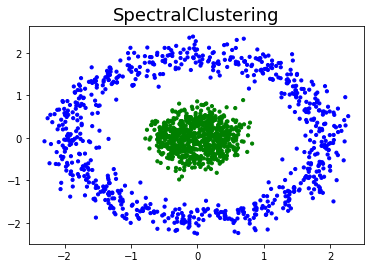

In [49]:
clustering_names=['SpectralClustering']
clustering_algorithms=[spectral]

for name, algorithm in zip(clustering_names,clustering_algorithms):
    
    t0=time.time()
    #time here is just for further purpose when i need to calculate time 
    algorithm.fit(X)
    t1=time.time()
    #time for further purpose
    if hasattr(algorithm,'labels_'):
        y_pred=algorithm.labels_.astype(np.int)
    else:
        y_pred=algrithm.predict(X)
        
    #plot
    
    if i==0:
        plt.title(name,size=18)
    
    plt.scatter(X[:, 0],X[:, 1],color=colors[y_pred].tolist(), s=10)